# Exploring 360 Giving data on bereavement related services

This workbook sets out the data preperation steps as well as analysis on the UK data.
The subsequent workbook focuses on England only data.

In [1]:
#Import packages for analysis
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sn
import datetime as dt

In [2]:
#Presenting non trunctated output
#Set presentation options
pd.options.display.max_columns = 250 # to avoid truncated output 
pd.options.display.max_rows = 250 #
pd.options.display.max_colwidth = 250 # avoid truncating cell content

In [37]:
### Read in data

UK_data = pd.read_csv('C:/Users/sonja/Desktop/Life_Admin/Bereavement_Services/data_5yrs.csv')
UK_data.shape

(1139, 79)

### Data Preparation

This section:
 - drops columns from the dataframe that are all nulls as well as other cols that are not relevant to this analysis;
 - changes to the column headers, specifically to remove symbols that affect how python reads the string;
 - adds two columns to the dataframe - one for financial year and secondly a country column so we can more easily group recipients by UK nation

In [38]:
#Drop any cols where all variables are null
UK_data = UK_data.dropna(axis = 1, how = 'all') #axis 1 relates to cols
UK_data.shape


(1139, 56)

We now have 56 columns, down from 79.

In [39]:
#UK_data.columns.tolist()

In [40]:
#We are also going to drop the cols labelled beneficiary 1 and up; and also recipient 1 and up; and 
#funding org postal code, Currency, License

columns_drop = ['Recipient_Org:Location:1:Geographic_Code_Type',
       'Recipient_Org:Location:1:Geographic_Code',
       'Recipient_Org:Location:1:Name',
       'Recipient_Org:Location:2:Geographic_Code_Type',
       'Recipient_Org:Location:2:Geographic_Code',
       'Recipient_Org:Location:2:Name', 'Beneficiary_Location:1:Name', 'Beneficiary_Location:1:Country_Code',
       'Beneficiary_Location:1:Geographic_Code',
       'Beneficiary_Location:1:Geographic_Code_Type',
       'Beneficiary_Location:2:Country_Code',
       'Beneficiary_Location:2:Geographic_Code',
       'Beneficiary_Location:2:Geographic_Code_Type',
       'Beneficiary_Location:3:Country_Code',
       'Beneficiary_Location:3:Geographic_Code',
       'Beneficiary_Location:3:Geographic_Code_Type',
               'Funding_Org:Postal_Code',
               'Currency', 'License_(see_note)', 'Publisher:Name' ]

UK_data.drop(columns_drop, inplace = True, axis = 1)
UK_data.shape

(1139, 36)

We are now down to 36 columns, down from 56.

In [41]:
# We need to change col headers and replace: with _
UK_data.columns = UK_data.columns.str.replace(':', '_')

In [42]:
#Adding a Financial Year column and a Country column 

In [43]:
#Define a function setting out the financial year(s) to populate using Award_Date

def financial_year(row):
    if row ['Award_Date'] > '2015-03-31' and row ['Award_Date'] < '2016-04-01':
        val= '2015/16'
    elif row ['Award_Date'] > '2016-03-31' and row ['Award_Date'] < '2017-04-01':
        val= '2016/17'
    elif row ['Award_Date'] > '2017-03-31' and row ['Award_Date'] < '2018-04-01':
        val= '2017/18'
    elif row ['Award_Date'] > '2018-03-31' and row ['Award_Date'] < '2019-04-01':
        val= '2018/19'
    else:
        val = '2019/20'
    return val

In [44]:
#create new column 'financial year' using the function 
UK_data['Financial_Year'] = UK_data.apply(financial_year, axis=1)

In [45]:
# Add Country column
#As the geographic code starts with E, N, S and W respectively, we will simply take the first letter
# and put a copy in a the new column
#Where we have a null in the geographic code column, "n" will populate the new column.
UK_data['Country'] = UK_data['Recipient_District_Geographic_Code'].astype(str).str[0]

In [46]:
UK_data.sample(2)

,Identifier,Title,Description,Amount_Applied_For,Amount_Awarded,Amount_Disbursed,Award_Date,URL,Planned_Dates_Start_Date,Planned_Dates_End_Date,Planned_Dates_Duration_(months),Recipient_Org_Identifier,Recipient_Org_Name,Recipient_Org_Charity_Number,Recipient_Org_Company_Number,Recipient_Org_Postal_Code,Recipient_Org_Location_0_Geographic_Code_Type,Recipient_Org_Location_0_Geographic_Code,Recipient_Org_Location_0_Name,Funding_Org_Identifier,Funding_Org_Name,Grant_Programme_Code,Grant_Programme_Title,Grant_Programme_URL,Beneficiary_Location_0_Name,Beneficiary_Location_0_Country_Code,Beneficiary_Location_0_Geographic_Code,Beneficiary_Location_0_Geographic_Code_Type,From_An_Open_Call?,Data_Source,Recipient_Region,Recipient_District,Recipient_District_Geographic_Code,Recipient_Ward,Recipient_Ward_Geographic_Code,Retrieved_for_use_in_GrantNav,Financial_Year,Country
949,360G-CR-1057937,Emergency Advice Service,"Inverclyde is Scotland’s second most deprived local authority. Financial Fitness is the area’s only independent financial advice service as there is no Citizens Advice Bureau. As a result of increasing demand, waiting times have increased from 3 ...",NaN,115743.0,NaN,2015-07-15,NaN,2015-09-18,2018-10-12,36.0,GB-SC-SC029817,Financial Fitness,SC029817,SC260631,NaN,CTRY,S92000003,Scotland,GB-CHC-326568,Comic Relief,NaN,NaN,NaN,Scotland,GB,S92000003,CTRY,NaN,https://docs.google.com/spreadsheets/d/1hNGEWC4sA28lx_vr1Ayw72z7fT80349TLvMpCDMRJoc/export?format=xlsx,Scotland,Inverclyde,S12000018,NaN,NaN,2020-08-18T03:00:03+02:00,2015/16,S
80,360G-CFSurrey-A448986,Counsellor Supervision and Mentoring Scheme,Supervision and support for volunteer counsellors.,4000.0,4000.0,NaN,2017-07-10,http://thecounsellingpartnershiip.org,2017-09-01,2017-12-31,3.0,GB-CHC-1076244,North Surrey Community Counselling Partnership ( NSCCP),1076244,NaN,NaN,NaN,NaN,NaN,GB-CHC-1111600,Community Foundation for Surrey,GPG 2017 7 July,Donor Funds,NaN,Elmbridge 007C,GB,E01030359,LSOA,NaN,https://www.cfsurrey.org.uk/wp-content/uploads/2018/07/CFforSurrey-Grant-Awards-2017-18.xlsx,NaN,NaN,NaN,NaN,NaN,2020-08-18T03:02:30+02:00,2017/18,n


In [47]:
UK_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1139 entries, 0 to 1138
Data columns (total 38 columns):
Identifier                                       1139 non-null object
Title                                            1139 non-null object
Description                                      1139 non-null object
Amount_Applied_For                               361 non-null float64
Amount_Awarded                                   1139 non-null float64
Amount_Disbursed                                 26 non-null float64
Award_Date                                       1139 non-null object
URL                                              352 non-null object
Planned_Dates_Start_Date                         793 non-null object
Planned_Dates_End_Date                           791 non-null object
Planned_Dates_Duration_(months)                  743 non-null float64
Recipient_Org_Identifier                         1139 non-null object
Recipient_Org_Name                               1139 no

We have no nulls for the following variables: Identifier, Title, Description, Amount_Awarded, Award_date, Recipient Org Identifier and Name, Data Source, Financial Year.

In the first instance the UK level analysis will make use of these variables.

We are also interested in:
 - Breaking down the analysis by Country - the Country - according to Geographic Code - is known for 723 out of 1139 observations.
 - Making use of the data on Planned_Dates_Duration_(months)  - this is known for 743 out of 1139 observations
 
We also need to understand the relationship between the following variables: charity number, recipient ID and recipient org name.





## UK data analysis (n = 1139)

Key findings: 
- For the five year period the average award was £43,598; the median was £8,750, suggesting there are a number of large awards; this is confirmed by our histograms. The distribution is exponential - basically we have a large number of relatively small awards and a long thin tail.


In [48]:
UK_data.describe()
#Amount applied for and Amount disbured data not being used here. V. high number of nulls and no 
#specific questions of interest.

,Amount_Applied_For,Amount_Awarded,Amount_Disbursed,Planned_Dates_Duration_(months)
count,361.000000,1.139000e+03,26.000000,743.000000
mean,9123.725291,4.359874e+04,12905.256538,18.444145
std,23113.169638,1.252067e+05,18826.009013,13.590340
min,0.000000,1.000000e+02,0.000000,0.000000
25%,1000.000000,2.793905e+03,1000.000000,11.000000
50%,3000.000000,8.750000e+03,2000.000000,12.000000
75%,7343.000000,2.000000e+04,15150.000000,35.000000
max,180000.000000,2.750000e+06,75000.000000,60.000000


### Distribution of Amount Awarded (5 year period)

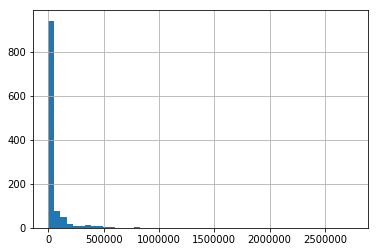

In [49]:
hist_UK_data = UK_data ['Amount_Awarded'].hist(bins=50)

### Amounts Awarded by Financial Year (n= 1139)

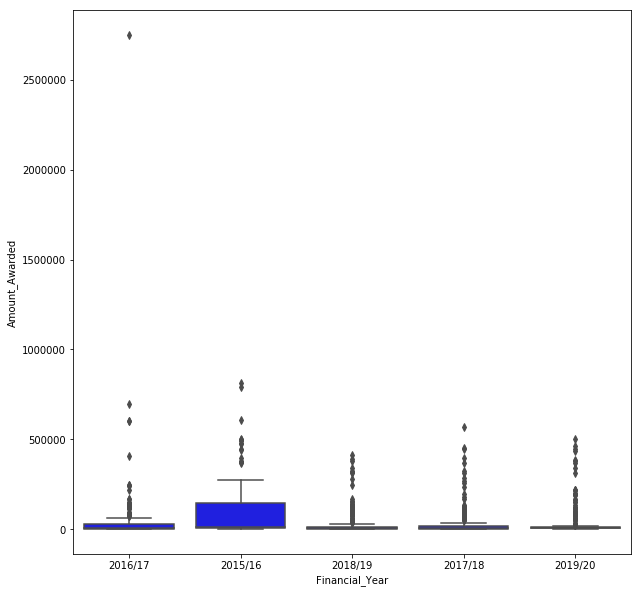

In [50]:
plt.figure(figsize=(10,10))
sn.boxplot(
    data=UK_data,
    x='Financial_Year',
    y='Amount_Awarded',
    color='blue')

We have an award in 2016/17 for £2.7 million which is a complete outlier. (This award went to Victim Support from the Ministry of Justice to support people bereaved by homicide. It was for a 12 month period).

This row was dropped for the remainder of the UK analysis.

In [51]:
#identify the row we want to drop and locate the index
UK_data.loc[UK_data['Amount_Awarded'] > 2000000]
#index = 2

,Identifier,Title,Description,Amount_Applied_For,Amount_Awarded,Amount_Disbursed,Award_Date,URL,Planned_Dates_Start_Date,Planned_Dates_End_Date,Planned_Dates_Duration_(months),Recipient_Org_Identifier,Recipient_Org_Name,Recipient_Org_Charity_Number,Recipient_Org_Company_Number,Recipient_Org_Postal_Code,Recipient_Org_Location_0_Geographic_Code_Type,Recipient_Org_Location_0_Geographic_Code,Recipient_Org_Location_0_Name,Funding_Org_Identifier,Funding_Org_Name,Grant_Programme_Code,Grant_Programme_Title,Grant_Programme_URL,Beneficiary_Location_0_Name,Beneficiary_Location_0_Country_Code,Beneficiary_Location_0_Geographic_Code,Beneficiary_Location_0_Geographic_Code_Type,From_An_Open_Call?,Data_Source,Recipient_Region,Recipient_District,Recipient_District_Geographic_Code,Recipient_Ward,Recipient_Ward_Geographic_Code,Retrieved_for_use_in_GrantNav,Financial_Year,Country
2,360G-cabinetoffice-GA-035384,Homicide Service,"To provide emotional, practical and specialist support to families bereaved by homicide since 2010.",NaN,2750000.0,NaN,2016-04-01,NaN,2016-04-01,2017-03-31,12.0,GB-CHC-298028,Victim Support,298028,NaN,NaN,NaN,NaN,NaN,GB-GOR-D18,Ministry of Justice,SCH-000003003,Homicide Service (National),NaN,England; Wales,NaN,K02000001,CTRY,Yes,https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/738720/360_16_17_awards.xlsx,NaN,NaN,NaN,NaN,NaN,2020-08-18T03:00:03+02:00,2016/17,n


In [52]:
#drop relevant row by index and give the dataframe a new name
UK_data_ex = UK_data.drop([2])
UK_data_ex.shape

(1138, 38)

In [54]:
UK_data_ex['Amount_Awarded'].max()
#We can see that the largest amount awarded is now 816k

816083.0

### Amounts Awarded by Financial Year (n= 1138)

Replotting the box plot to look at the distributions of amounts awarded by financial year. Recall that a box plot helps show comparisons between variables or across levels of a categorical variable - in this case financial year. The main body of the box plot showing the quartiles (25th and 75th percentile). The medians have horizontal lines at the median of each box and while whiskers have the vertical lines extending to the most extreme, non-outlier data points and caps are the horizontal lines at the ends of the whiskers.
Outliers are defined as points that lie 1.5 times the interquartile range past the quartlies.

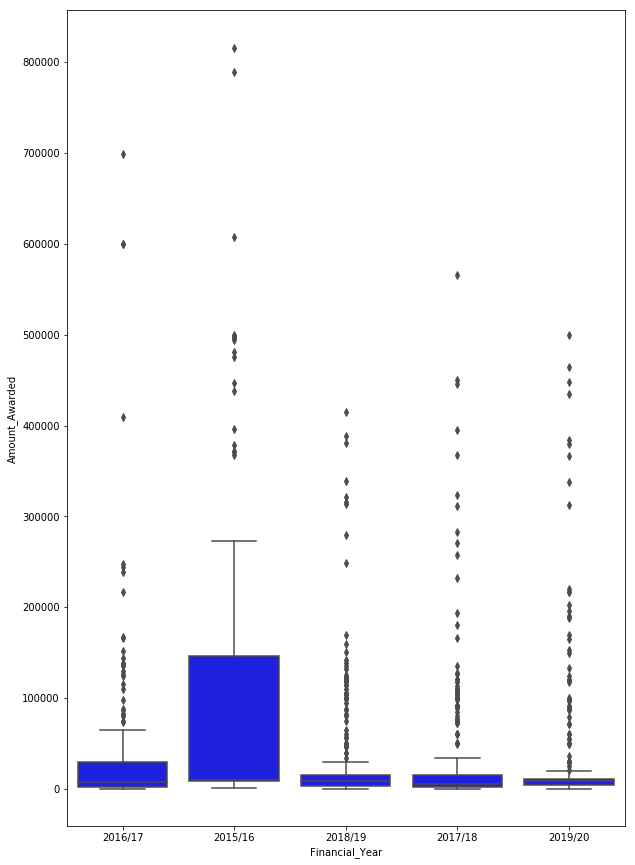

In [61]:
plt.figure(figsize=(10,15))
sn.boxplot(
    data=UK_data_ex,
    x='Financial_Year',
    y='Amount_Awarded',
    color='blue')

The revised box plot suggests that there are still a large number outlier awards - the distributions are very skewed and median values are hard to read on the plot.
#Talk : replot and lose more outliers.....?

In [74]:
#Let's look at descriptive stats for the grouped data
UK_data_ex['Amount_Awarded'].groupby(UK_data_ex['Financial_Year']).describe()

,count,mean,std,min,25%,50%,75%,max
Financial_Year,,,,,,,,
2015/16,98.0,118736.473163,191002.065250,500.0,8239.7775,10000.000,146380.00,816083.0
2016/17,174.0,40443.314195,97476.482288,125.0,1974.1250,8150.000,30000.00,698998.0
2017/18,311.0,31276.250579,73123.413360,100.0,2040.2000,5000.000,15391.00,566160.0
2018/19,269.0,32675.137993,67523.062049,100.0,3500.0000,8737.000,15000.00,415002.0
2019/20,286.0,33982.971818,79310.665310,360.0,4000.0000,8998.395,10552.75,500000.0


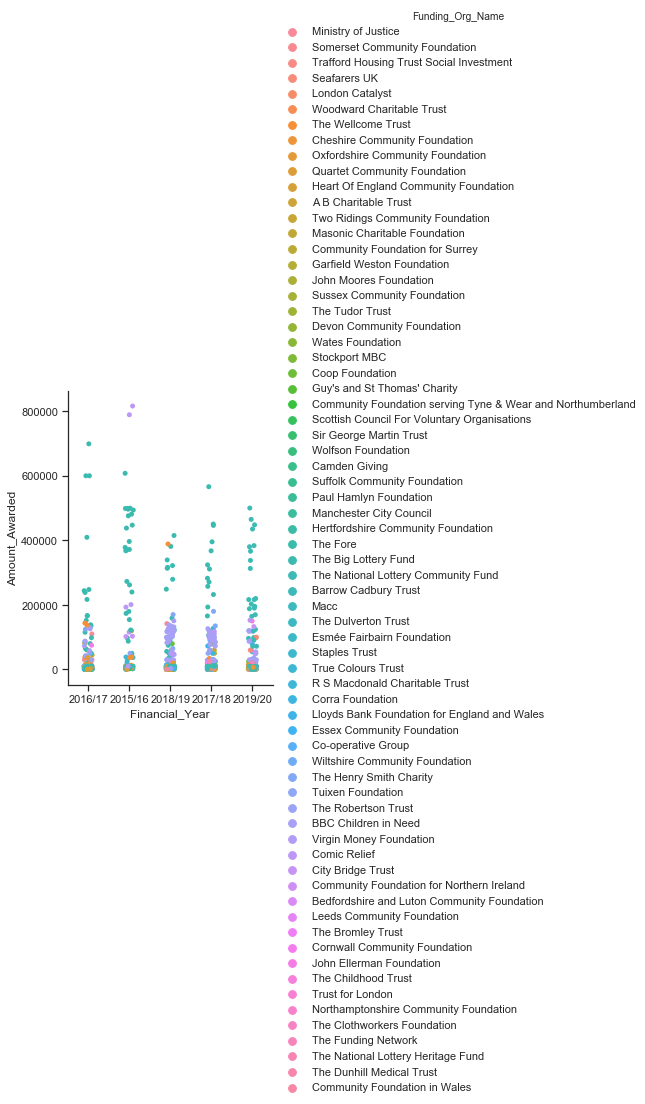

In [78]:
#Let's bring Funder in?
sn.set(style="ticks")

g = sn.catplot(x="Financial_Year", y="Amount_Awarded", hue="Funding_Org_Name", data=UK_data_ex)

#Needs more work - too much going on- talk!

In [79]:
#data['Funding_Org_Name'].value_counts().head(70).plot(
 #   kind='barh', figsize = (20,60))

In [76]:
#data['Funding_Org_Name'].value_counts()

In [77]:
#data['Recipient_Org_Name'].value_counts().head(400).plot(
   # kind='barh', figsize=(30,300))

### Which Funders gave the largest grants (on average?)

In [80]:
#group_by_funder = data.groupby('Funding_Org_Name')
#We're grouping the data by funder
#and then the mean amount awarded 
#print (group_by_funder['Amount_Awarded'].agg(np.mean))#.sort_values(by = 'ascending')
#print (group_by_funder['Amount_Awarded'].agg([np.sum, np.size, np.mean, np.std]))

In [18]:
#Where next:
#1) Find out which funders started contributing to 360G when? 

####Working with entire dataset ( n = 1139)
# 2)# Add a new column for the financial year; set condition based on Award
#Date column to arrive at financial year entry  - DONE
#3) Look at how a) Numbers of Awards and b) Amounts awarded change by FY - DONE

#### Working with the subset of data for which we have planned duration (n = 943)
#4) Look at distribution of planned duration
### - a) do this for the whole dataset
    ### - hist, box & whiskers & swarm plot?
### - b) do this for the different financial years
##### - need something that captures and shows dbn.

### Work with the subset of the data for which we have recipient district (n=693)
 #- will have a look. not sure what we would be able to conclude.
    

In [81]:
#IGNORE
#df[df['var1'].str[0] == 'A']
#https://www.listendata.com/2019/07/how-to-filter-pandas-dataframe.html
#England = data[data['Recipient_District_Geographic_Code'].str[0]=="E"]
#England.shape
#nulls are homeless currently